   # TP53: Effects of Mutation on TP53BP1

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### Proteome abundance of TP53BP1 (no effect)

In [6]:
gene = 'TP53'
protList = ['TP53BP1']
sigList = [];

pcutoff = 0.05/len(protList)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteindfName = protein + " protein"
        proteindf.columns = [proteindfName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteindfName], wt[proteindfName])
        if ttest[1] <= pcutoff:
            sigList.append(protein)
            print("Test for " + protein + ": ")
            print(ttest)

### Phosphoproteome of TP53BP1

In [10]:
gene = 'TP53'
sites = phos.filter(regex='TP53BP')
sigPhosResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

pcutoff = 0.05/len(cross.columns)
#pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigPhosResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

Results for TP53BP1-S1431: 
Ttest_indResult(statistic=4.819602521158986, pvalue=6.619797586243582e-06)
Results for TP53BP1-S1435: 
Ttest_indResult(statistic=4.74121449433656, pvalue=7.210127219127611e-06)
Results for TP53BP1-S1683: 
Ttest_indResult(statistic=4.687964245279931, pvalue=9.535677192577145e-06)
Results for TP53BP1-S1706: 
Ttest_indResult(statistic=5.643489011660524, pvalue=3.294769768234183e-07)
Results for TP53BP1-S1763: 
Ttest_indResult(statistic=7.045858275075653, pvalue=7.196228903923844e-10)
Results for TP53BP1-S1764: 
Ttest_indResult(statistic=4.387625978778714, pvalue=3.4228154547355373e-05)
Results for TP53BP1-S867: 
Ttest_indResult(statistic=4.364161237074746, pvalue=5.013280141618629e-05)


[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

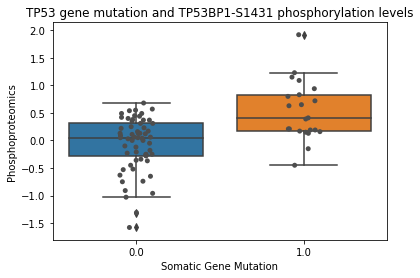

In [12]:
site = sigPhosResults[0]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

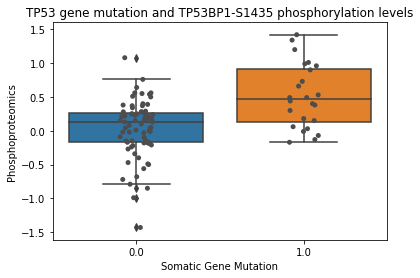

In [19]:
site = sigPhosResults[1]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

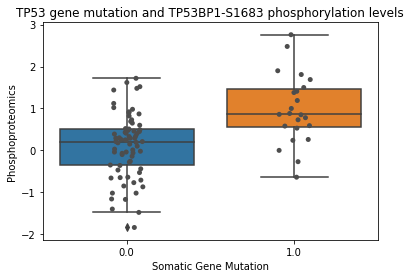

In [20]:
site = sigPhosResults[2]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

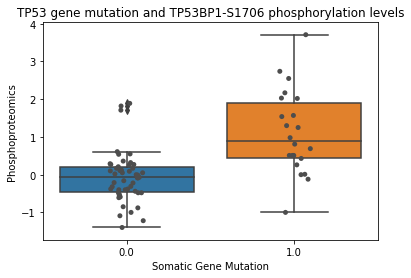

In [21]:
site = sigPhosResults[3]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

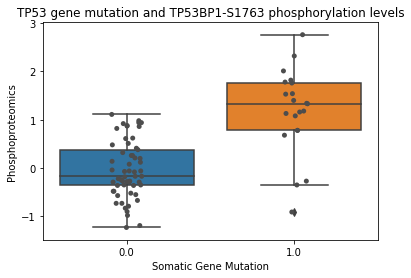

In [22]:
site = sigPhosResults[4]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

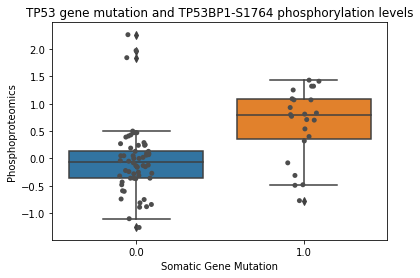

In [23]:
site = sigPhosResults[5]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

[Text(0,0.5,'Phosphoproteomics'), Text(0.5,0,'Somatic Gene Mutation')]

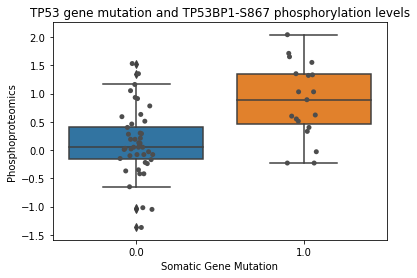

In [26]:
site = sigPhosResults[6]
phos_boxplot = sns.boxplot(data=cross, x=gene ,y=site)
phos_boxplot.set_title(gene + " gene mutation and " + site + " phosphorylation levels")
phos_boxplot = sns.stripplot(data=cross, x=gene, y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")